# Decision Trees

A decision tree is a decision support tool that uses a tree like model of decisions and their possible consequences, including chance event outcomes, resource costs and utility. It is one way to display an algorithm that only contains conditional control statements.

## Problem Statement

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

In [1]:
# Importing the required libraries and reading the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\user\miniconda3\envs\myenv\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [22]:
df = pd.read_csv("Iris.csv", index_col = 0)

In [23]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [25]:
target = df["Species"]
df1 = df.copy()
df1 = df1.drop("Species", axis = 1)
df1.shape

(150, 4)

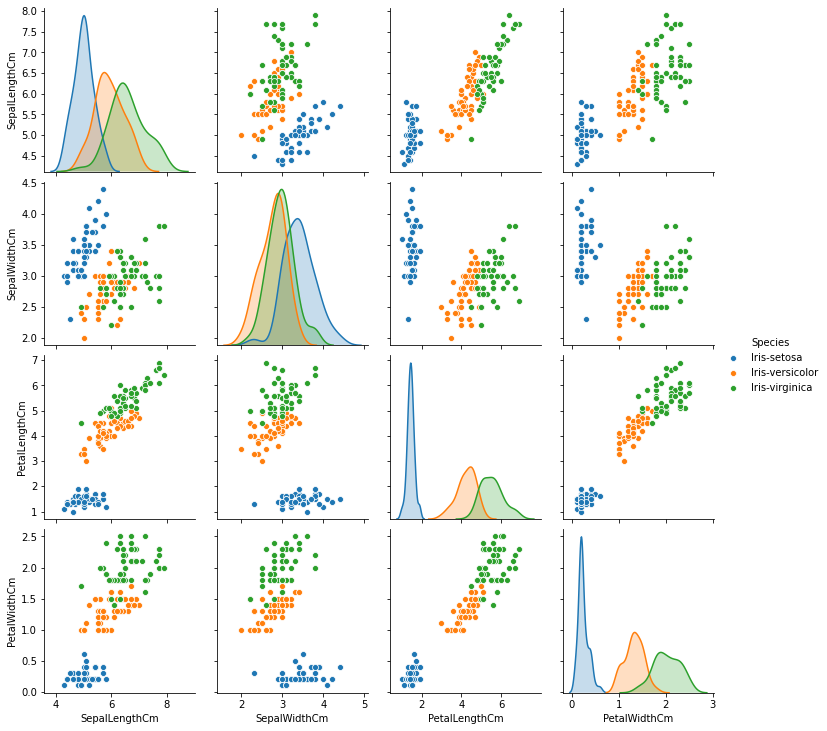

In [26]:
sns.pairplot(df, hue = "Species")

<AxesSubplot:>

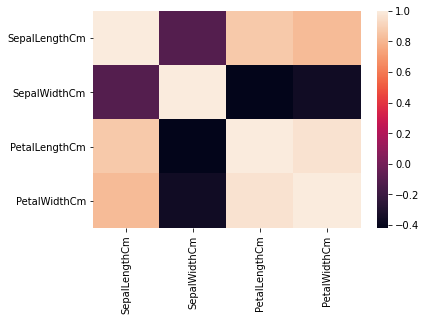

In [27]:
# correlation matrix

sns.heatmap(df.corr())

In [28]:
# Defining the attributes and labels

x = df.iloc[:, [0, 1, 2, 3]].values
le = LabelEncoder()
df["Species"] = le.fit_transform(df["Species"])
y = df["Species"].values
print("The shape of the data is:", df.shape)

The shape of the data is: (150, 5)


## Model Training

Lets split the data into test and train for training our model

In [29]:
# Splitting the data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("Training split:", x_train.shape)
print("Testing split:", x_test.shape)

Training split: (120, 4)
Testing split: (30, 4)


In [30]:
# Defining the decision tree algorithm

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
print("Decision tree classifier created")

Decision tree classifier created


In [31]:
# Predicting the values of test data

y_pred = dtree.predict(x_test)
print("Classification report: \n", classification_report(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Accuracy score: 1.0')

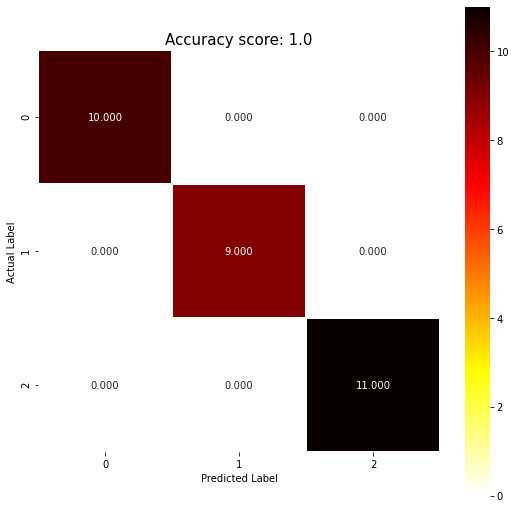

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt = ".3f", linewidths = .5, square = True, cmap = "hot_r");
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title = "Accuracy score: {0}".format(dtree.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

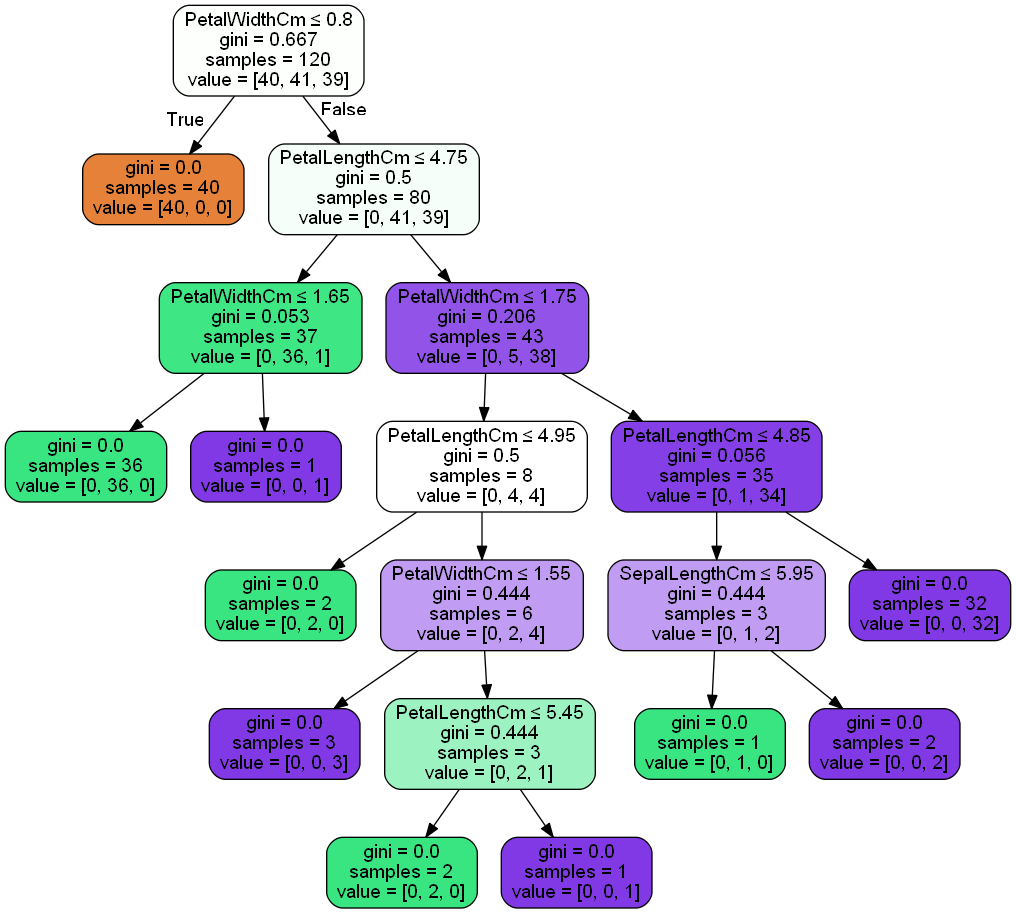

In [33]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=df1.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

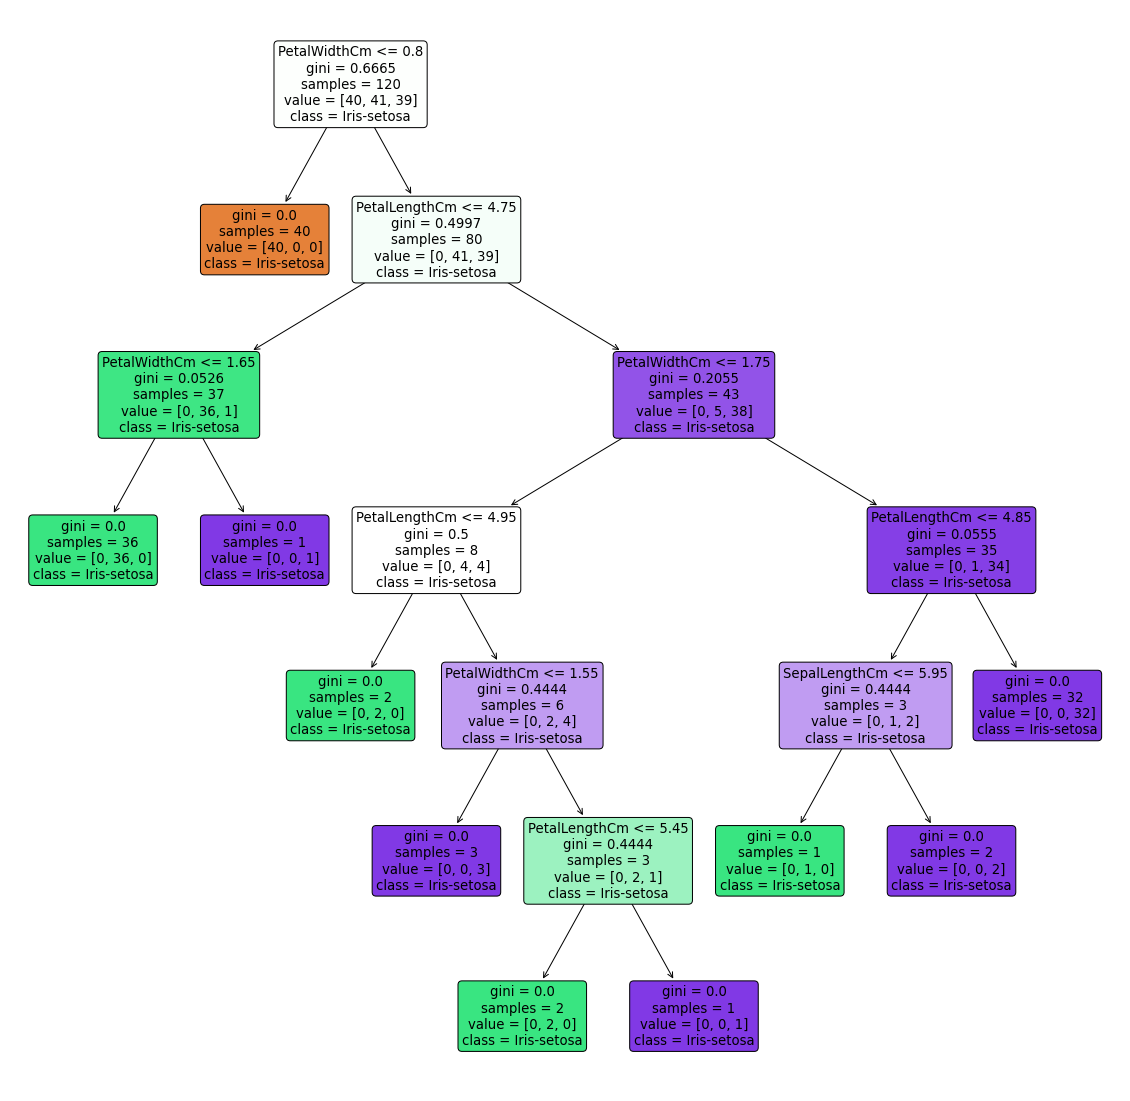

In [34]:
plt.figure(figsize = (20,20))
dec_tree = plot_tree(dtree, feature_names = df1.columns, class_names = target.values, filled = True, precision = 4, rounded = True);

This concludes this project